# NLP Project: Sentiment Analysis
![sent](images/Sentiment.png)

* reference: https://neptune.ai/blog/10-nlp-projects
* dataset: [Amazon Review Data (2018) - video games rating 5-scores](https://nijianmo.github.io/amazon/index.html)

## Import packages

In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline 

sns.set_style('ticks', rc={'xtick.direction':'in', 'ytick.direction':'in', \
                           'xtick.top':True, 'ytick.right':True})

In [2]:
# define the directories

datadir = '../datasets/raw'
datadir_pr = '../datasets/processed'  # directory where the cleaned datasets are stored
figdir = '../output/figures'

In [3]:
# reading reviews from json file
with open(os.path.join(datadir, 'Video_Games_5.json')) as f:
    data = ndjson.load(f)

In [4]:
reviews_df = pd.DataFrame(data)

In [5]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


## Datasets
   * __reviewerID__ - ID of the reviewer, e.g. A2SUAM1J3GNN3B
   * __asin__ - ID of the product, e.g. 0000013714
   * **reviewerName** - name of the reviewer
   * **vote** - helpful votes of the review
   * **style** - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
   * **reviewText** - text of the review
   * **overall** - rating of the product
   * **summary** - summary of the review
   * **unixReviewTime** - time of the review (unix time)
   * **reviewTime** - time of the review (raw)
   * **image** - images that users post after they have received the product


In [6]:
reviews_df.shape

(497577, 12)

In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


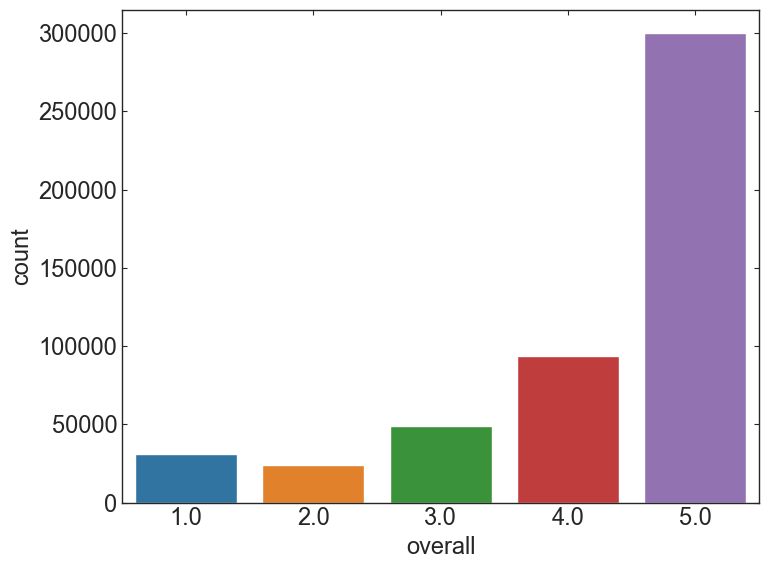

In [8]:
# draw count plots

fig, ax = plt.subplots()
sns.countplot(data=reviews_df, x='overall', ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'overall_rate.png'));

In [9]:
len(reviews_df['asin'].value_counts(dropna=False))

17408

## Undersampling of Reviews
* Taking a random sample of the reviews by selecting 300 reviews with rating 1, 100 reviews with ratings 2, 3, 4, and 300 reviews with rating 5. This way we get a smaller balanced corpus.


In [10]:
one_rate   = reviews_df[reviews_df['overall']==1.0].sample(n=300)
two_rate   = reviews_df[reviews_df['overall']==2.0].sample(n=100)
three_rate = reviews_df[reviews_df['overall']==3.0].sample(n=100)
four_rate  = reviews_df[reviews_df['overall']==4.0].sample(n=100)
five_rate  = reviews_df[reviews_df['overall']==5.0].sample(n=300)

In [12]:
undersampled_reviews = pd.concat([one_rate, two_rate, three_rate, four_rate, five_rate], axis=0)

In [13]:
undersampled_reviews['overall'].value_counts(dropna=False)

1.0    300
5.0    300
2.0    100
3.0    100
4.0    100
Name: overall, dtype: int64

In [14]:
undersampled_reviews.sample(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
276516,4.0,True,"11 5, 2014",A1C8J2REZTKQG,B008U5ZM6E,Justin Pena,"Great keyboard, the only downfall is that it i...",Four Stars,1415145600,NaN,{'Style:': ' Ultimate'},NaN
490115,3.0,True,"11 27, 2017",A24AOGQH7N9G20,B00HW6K4CY,S. Runyon,"As a Hidden Object game buff, this one is okay...",Fun During Holidays.,1511740800,NaN,NaN,NaN
118957,2.0,True,"06 12, 2009",AKRXP6EQVTDM1,B000VV9T7S,Fenrir,I got this game on the cheap after reading a l...,Endless Enemies = Endless Anger,1244764800,5,NaN,NaN
239510,5.0,True,"05 29, 2015",A8AN9EXX2Q87U,B0050SXLQC,Ana Loreto,EXCELENTE,Five Stars,1432857600,NaN,{'Format:': ' Video Game'},NaN
6861,5.0,False,"05 27, 2003",A9AX1D31T7J1S,B00002EPZ2,Zachary Gochenour,"Years after its release, Planescape: Torment i...",Model for CRPGs and epic gaming,1053993600,7,NaN,NaN


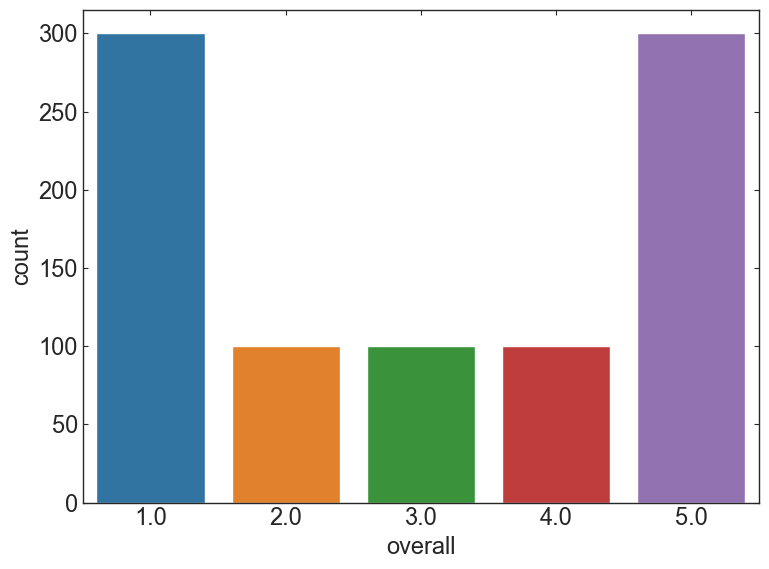

In [15]:
# draw count plots

fig, ax = plt.subplots()
sns.countplot(data=undersampled_reviews, x='overall', ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'under_sample.png'));

### Random Sampling of 100K Reviews

In [16]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)

### Writing Corpora

In [17]:
undersampled_reviews.to_csv(os.path.join(datadir_pr,"small_corpus.csv"), index=False)

In [18]:
sample_100K_revs.to_csv(os.path.join(datadir_pr,"big_corpus.csv"), index=False)